In [30]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import f1_score
import time

sys.path.insert(1, os.path.join(sys.path[0], "code/implementation"))
from layer_v2 import Layer
from neural_network_v2 import NeuralNetwork

In [3]:
def visualize_fit_of_regression(data_frame, neural, std):
    y = neural.predict(data_frame["x"])
    plt.scatter(data_frame["x"], y, c="red")
    plt.scatter(data_frame["x"], data_frame["y"], c="blue")
    plt.legend(["Prediction", "True"])
    return neural.calculate_cost(data_frame["x"], data_frame["y"]) * std["y"] ** 2

In [4]:
multimodal_train = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/regression/multimodal-large-training.csv"
)
multimodal_test = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/regression/multimodal-large-test.csv"
)
mean = multimodal_train.mean()
std = multimodal_train.std()
multimodal_train = (multimodal_train - mean) / std
multimodal_test = (multimodal_test - mean) / std

# Joke but works surprisingly well  

In [62]:
neural = NeuralNetwork(cost_function="mse")
neural.add_layer(Layer(1, 10, "relu"))
neural.add_layer(Layer(10, 20, "relu"))
neural.add_layer(Layer(20, 100, "relu"))
neural.add_layer(Layer(100, 1, "linear"))
mse = neural.train(multimodal_test["x"], multimodal_test["y"], max_num_epoch=1500, learning_rate=0.001)

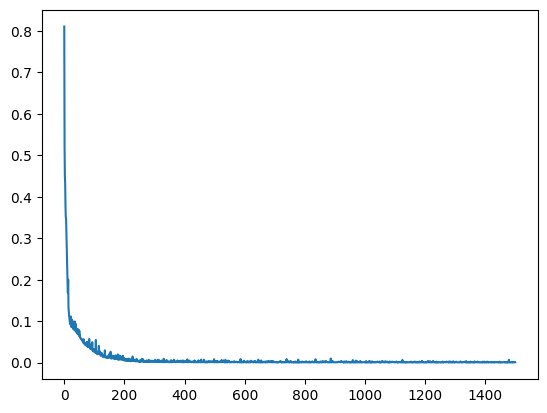

In [65]:
plt.plot(mse)

3.99819177606917

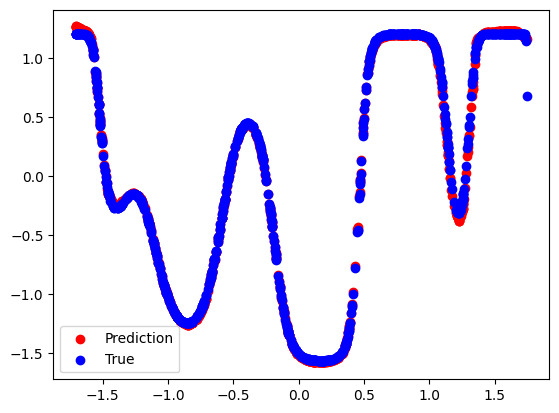

In [64]:
visualize_fit_of_regression(multimodal_test, neural, std)

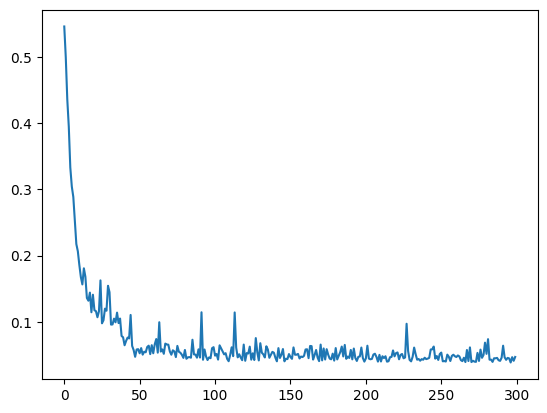

In [83]:
neural = NeuralNetwork(cost_function="mse")
neural.add_layer(Layer(1, 10, "relu"))
neural.add_layer(Layer(10, 10, "relu"))
neural.add_layer(Layer(10, 1, "linear"))
mse = neural.train(
    multimodal_test["x"], multimodal_test["y"], max_num_epoch=300, learning_rate=0.01
)
plt.plot(mse)

260.18254576183864

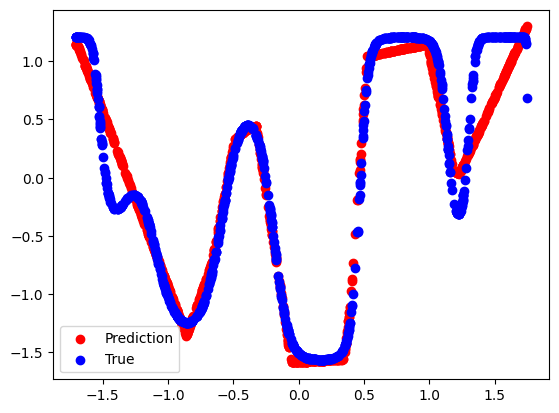

In [84]:
visualize_fit_of_regression(multimodal_test, neural, std)

In [28]:
activation_functions = ["relu", "sigmoid", "tanh", "linear", "leaky_relu"]
initialization_methods = [
    "normal",
    "uniform_xavier",
    "he",
    "normal_xavier",
    "uniform_minus_one_one",
    "uniform_zero_one",
]
number_of_repetition = 2 # 10

In [32]:
from collections import defaultdict 
df = pd.DataFrame(columns=["Initialization", "Activation", "Hidden Layers", "Cost", "Computation Time"])
after_epoch_dict = defaultdict(lambda: []) 

for initialization_method in initialization_methods:
    for activation in activation_functions:
        for _ in range(number_of_repetition):
            # One hidden layer creation
            one_hidden = NeuralNetwork(cost_function="mse")
            one_hidden.add_layer(
                Layer(1, 10, activation, weight_initialization=initialization_method)
            )
            one_hidden.add_layer(Layer(10, 1, "linear"))

            # Two hidden layers creation
            two_hidden = NeuralNetwork(cost_function="mse")
            two_hidden.add_layer(
                Layer(1, 10, activation, weight_initialization=initialization_method)
            )
            two_hidden.add_layer(
                Layer(10, 10, activation, weight_initialization=initialization_method)
            )
            two_hidden.add_layer(Layer(10, 1, "linear"))

            # Three hidden layers creation
            three_hidden = NeuralNetwork(cost_function="mse")
            three_hidden.add_layer(
                Layer(1, 10, activation, weight_initialization=initialization_method)
            )
            three_hidden.add_layer(
                Layer(10, 10, activation, weight_initialization=initialization_method)
            )
            three_hidden.add_layer(
                Layer(10, 10, activation, weight_initialization=initialization_method)
            )
            three_hidden.add_layer(Layer(10, 1, "linear"))

            # Training
            time_start = time.time()
            one_cost_after_epoch = one_hidden.train(
                multimodal_train["x"],
                multimodal_train["y"],
                max_num_epoch=20,
                learning_rate=0.01,
            )
            time_first = time.time() - time_start
            two_cost_after_epoch = two_hidden.train(
                multimodal_train["x"],
                multimodal_train["y"],
                max_num_epoch=20,
                learning_rate=0.01,
            )
            time_second = time.time() - time_start - time_first
            three_cost_after_epoch = three_hidden.train(
                multimodal_train["x"],
                multimodal_train["y"],
                max_num_epoch=20,
                learning_rate=0.01,
            )
            time_third = time.time() - time_start - time_first - time_second

            # Testing
            one_hidden_test_cost = one_hidden.calculate_cost(
                multimodal_test["x"], multimodal_test["y"]
            )
            two_hidden_test_cost = two_hidden.calculate_cost(
                multimodal_test["x"], multimodal_test["y"]
            )
            three_hidden_test_cost = three_hidden.calculate_cost(
                multimodal_test["x"], multimodal_test["y"]
            )

            # Saving cost after training results
            df.loc[len(df.index)] = [
                initialization_method,
                activation,
                "1",
                one_hidden_test_cost,
                time_first
            ]
            df.loc[len(df.index)] = [
                initialization_method,
                activation,
                "2",
                two_hidden_test_cost,
                time_second
            ]
            df.loc[len(df.index)] = [
                initialization_method,
                activation,
                "3",
                three_hidden_test_cost,
                time_third
            ]
            
            # Saving cost after epoch results
            after_epoch_dict[
                f"{initialization_method}/{activation}/1"
            ].append(one_cost_after_epoch)
            after_epoch_dict[
                f"{initialization_method}/{activation}/2"
            ].append(two_cost_after_epoch)
            after_epoch_dict[
                f"{initialization_method}/{activation}/3"
            ].append(three_cost_after_epoch)
    print(f"Initialization method {initialization_method} done")

Initialization method normal done
Initialization method uniform_xavier done
Initialization method he done
Initialization method normal_xavier done
Initialization method uniform_minus_one_one done
Initialization method uniform_zero_one done


In [20]:
df 

,Initialization,Activation,Hidden Layers,Cost
0,normal,relu,1,0.172739
1,normal,relu,2,0.046313
2,normal,relu,3,0.002918
3,normal,relu,1,0.110258
4,normal,relu,2,0.047574
...,...,...,...,...
265,uniform_zero_one,leaky_relu,2,0.484118
266,uniform_zero_one,leaky_relu,3,0.063377
267,uniform_zero_one,leaky_relu,1,0.395424
268,uniform_zero_one,leaky_relu,2,0.154904


Text(0.5, 1.0, 'Cost of Neural Network with Different Activation Functions and Hidden Layers with He Initialization')

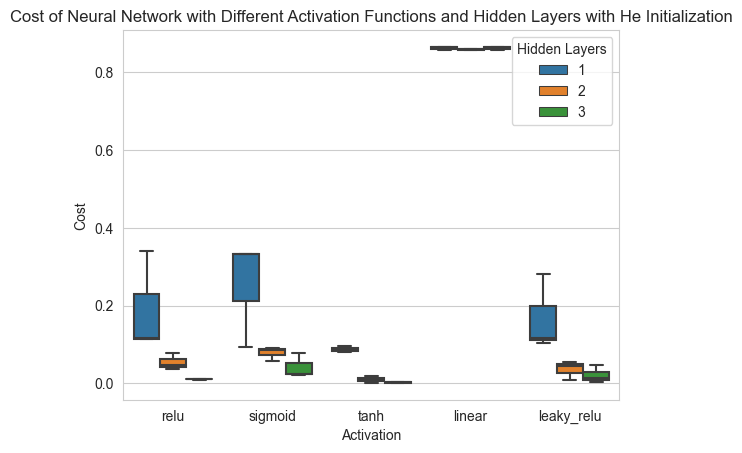

In [21]:
import seaborn as sns
sns.set_style("whitegrid")
df_he = df[df["Initialization"] == "he"]
sns.boxplot(x="Activation", y="Cost", data=df_he, hue="Hidden Layers")
plt.title(
    "Cost of Neural Network with Different Activation Functions and Hidden Layers with He Initialization"
)

In [22]:
after_epoch_dict

defaultdict(<function __main__.<lambda>()>,
            {'normal/relu/1': [[8.10805346422164,
               0.45423648654438165,
               0.38819634552955096,
               0.3504820813400083,
               0.35431383915889253,
               0.3312999075292612,
               0.33876107349432966,
               0.3237175723925309,
               0.32648335767978415,
               0.3492865368372676,
               0.3200338969818546,
               0.348849214285129,
               0.3280755325650344,
               0.3280589346764684,
               0.3206519331851008,
               0.326768911153313,
               0.33165500355218175,
               0.32165404873550535,
               0.2898764990068503,
               0.19883594193812643,
               0.18352927756907317],
              [23.10772873738383,
               0.4365062242398568,
               0.32912215236004133,
               0.27190473837195667,
               0.21693880351416747,
               0.1991

['normal', 'relu', '1']
['normal', 'relu', '2']
['normal', 'relu', '3']
['normal', 'sigmoid', '1']
['normal', 'sigmoid', '2']
['normal', 'sigmoid', '3']
['normal', 'tanh', '1']
['normal', 'tanh', '2']
['normal', 'tanh', '3']
['normal', 'linear', '1']
['normal', 'linear', '2']
['normal', 'linear', '3']
['normal', 'leaky_relu', '1']
['normal', 'leaky_relu', '2']
['normal', 'leaky_relu', '3']
['uniform_xavier', 'relu', '1']
['uniform_xavier', 'relu', '2']
['uniform_xavier', 'relu', '3']
['uniform_xavier', 'sigmoid', '1']
['uniform_xavier', 'sigmoid', '2']
['uniform_xavier', 'sigmoid', '3']
['uniform_xavier', 'tanh', '1']
['uniform_xavier', 'tanh', '2']
['uniform_xavier', 'tanh', '3']
['uniform_xavier', 'linear', '1']
['uniform_xavier', 'linear', '2']
['uniform_xavier', 'linear', '3']
['uniform_xavier', 'leaky_relu', '1']
['uniform_xavier', 'leaky_relu', '2']
['uniform_xavier', 'leaky_relu', '3']
['he', 'relu', '1']
['he', 'relu', '2']
['he', 'relu', '3']
['he', 'sigmoid', '1']
['he', 'sig

Text(0, 0.5, 'MSE')

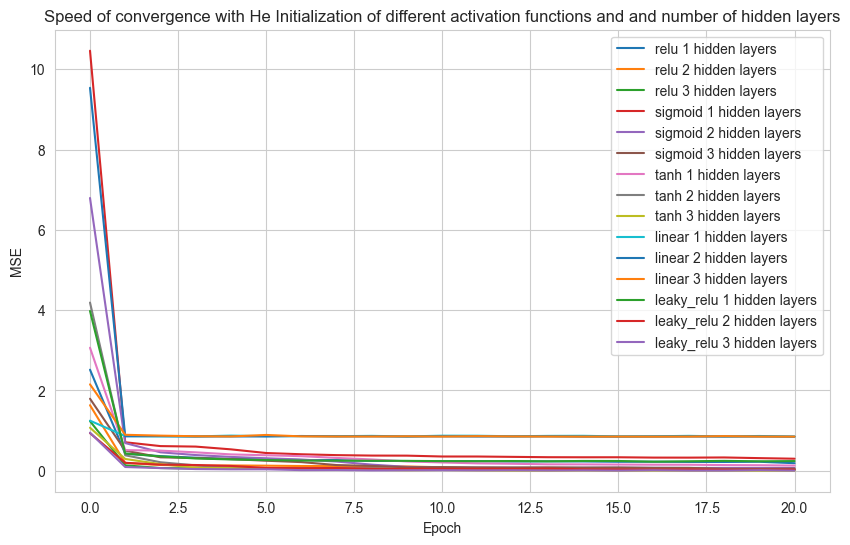

In [27]:
plt.figure(figsize=(10, 6))
for key, value in after_epoch_dict.items():
    key  = key.split("/")
    print(key)
    label = f"{key[1]} {key[2]} hidden layers"
    if key[0] == "uniform_xavier":
        plt.plot(np.mean(value, axis=0), label=label)
plt.legend()
plt.title("Speed of convergence with He Initialization of different activation functions and and number of hidden layers")
plt.xlabel("Epoch")
plt.ylabel("MSE")